# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.3714, -0.1371,  0.1145,  1.0698, -0.1960, -0.9614, -0.4653,  0.6512,
          1.1496,  0.5244]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.3207)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

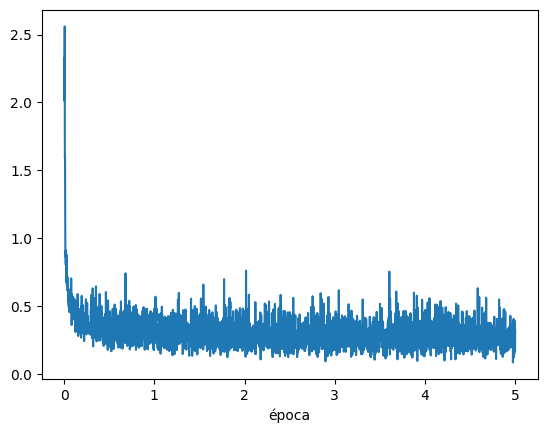

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

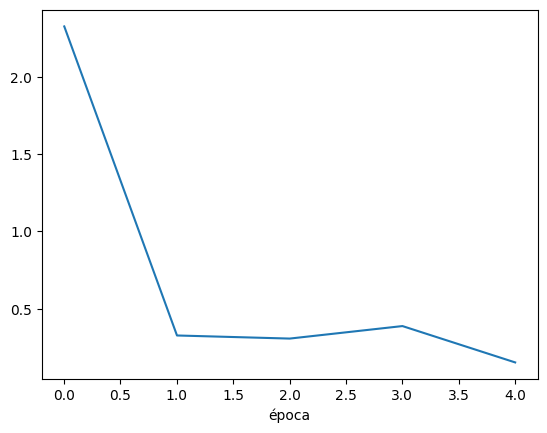

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [12]:
for epoch in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        # Transformar a entrada
        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs)
        loss = criterion(outputs, Variable(y_train))

        # Backprop e atualização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 👇 Printar o tamanho do batch e o progresso
        print(f"Época: {epoch+1}/{n_epochs}, batch: {k+1}, tamanho do mini-batch: {x_train.size(0)}")

Época: 1/5, batch: 1, tamanho do mini-batch: 100
Época: 1/5, batch: 2, tamanho do mini-batch: 100
Época: 1/5, batch: 3, tamanho do mini-batch: 100
Época: 1/5, batch: 4, tamanho do mini-batch: 100
Época: 1/5, batch: 5, tamanho do mini-batch: 100
Época: 1/5, batch: 6, tamanho do mini-batch: 100
Época: 1/5, batch: 7, tamanho do mini-batch: 100
Época: 1/5, batch: 8, tamanho do mini-batch: 100
Época: 1/5, batch: 9, tamanho do mini-batch: 100
Época: 1/5, batch: 10, tamanho do mini-batch: 100
Época: 1/5, batch: 11, tamanho do mini-batch: 100
Época: 1/5, batch: 12, tamanho do mini-batch: 100
Época: 1/5, batch: 13, tamanho do mini-batch: 100
Época: 1/5, batch: 14, tamanho do mini-batch: 100
Época: 1/5, batch: 15, tamanho do mini-batch: 100
Época: 1/5, batch: 16, tamanho do mini-batch: 100
Época: 1/5, batch: 17, tamanho do mini-batch: 100
Época: 1/5, batch: 18, tamanho do mini-batch: 100
Época: 1/5, batch: 19, tamanho do mini-batch: 100
Época: 1/5, batch: 20, tamanho do mini-batch: 100
Época: 1/

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [13]:
batch_sizes = [100, 200, 300, 400, 500]

results_iter = {}

for bs in batch_sizes:
    print(f"\nTreinando com batch_size = {bs}")
    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)

    losses_iter = []  # lista para salvar a perda de cada mini-batch

    for epoch in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            inputs = Variable(x_train.view(-1, 28*28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses_iter.append(loss.item())  # 🔹 salva a perda a cada batch

            # print opcional para acompanhar o treinamento
            if (k + 1) % 100 == 0:
                print(f"Época: {epoch+1}/{n_epochs}, Iteração: {k+1}, Loss: {loss.item():.4f}")

    results_iter[bs] = losses_iter  # 🔹 guarda todas as perdas desse batch_size



Treinando com batch_size = 100
Época: 1/5, Iteração: 100, Loss: 0.1375
Época: 1/5, Iteração: 200, Loss: 0.1631
Época: 1/5, Iteração: 300, Loss: 0.1843
Época: 1/5, Iteração: 400, Loss: 0.1639
Época: 1/5, Iteração: 500, Loss: 0.2519
Época: 1/5, Iteração: 600, Loss: 0.3272
Época: 2/5, Iteração: 100, Loss: 0.2593
Época: 2/5, Iteração: 200, Loss: 0.1699
Época: 2/5, Iteração: 300, Loss: 0.0976
Época: 2/5, Iteração: 400, Loss: 0.2354
Época: 2/5, Iteração: 500, Loss: 0.2497
Época: 2/5, Iteração: 600, Loss: 0.4051
Época: 3/5, Iteração: 100, Loss: 0.2738
Época: 3/5, Iteração: 200, Loss: 0.2205
Época: 3/5, Iteração: 300, Loss: 0.2830
Época: 3/5, Iteração: 400, Loss: 0.2006
Época: 3/5, Iteração: 500, Loss: 0.2246
Época: 3/5, Iteração: 600, Loss: 0.2977
Época: 4/5, Iteração: 100, Loss: 0.3019
Época: 4/5, Iteração: 200, Loss: 0.1804
Época: 4/5, Iteração: 300, Loss: 0.1863
Época: 4/5, Iteração: 400, Loss: 0.1745
Época: 4/5, Iteração: 500, Loss: 0.2362
Época: 4/5, Iteração: 600, Loss: 0.1873
Época: 5

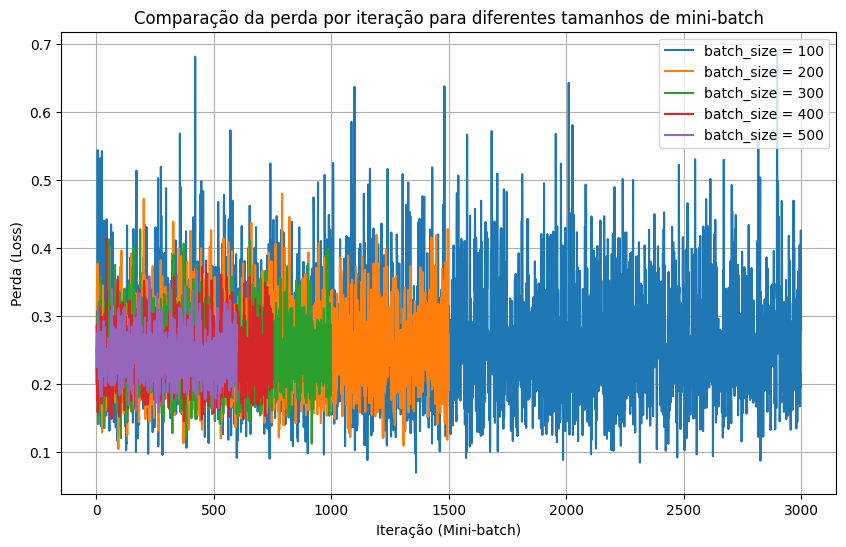

In [14]:
# gráfico de comparação da queda da perda para diferentes interações
plt.figure(figsize=(10, 6))
for bs, losses in results_iter.items():
    plt.plot(range(1, len(losses) + 1), losses, label=f'batch_size = {bs}')

plt.xlabel('Iteração (Mini-batch)')
plt.ylabel('Perda (Loss)')
plt.title('Comparação da perda por iteração para diferentes tamanhos de mini-batch')
plt.legend()
plt.grid(True)
plt.show()

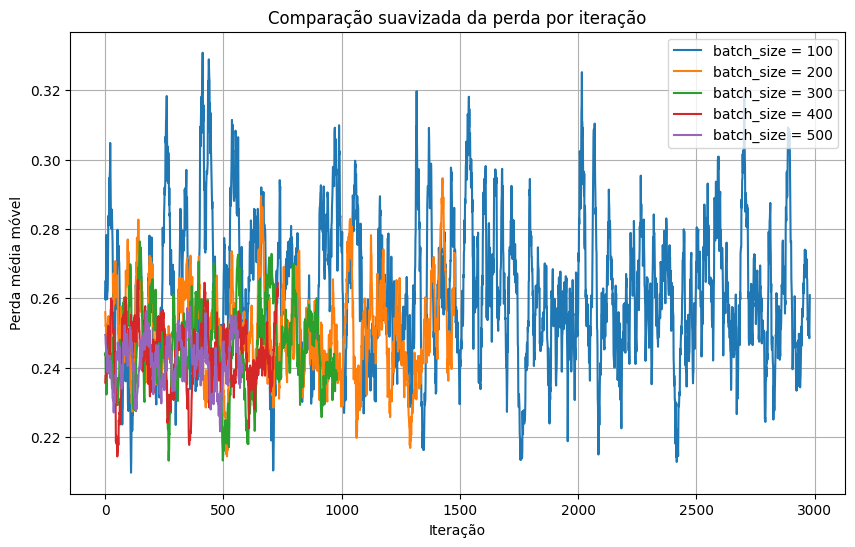

In [15]:
import numpy as np

def moving_average(x, w=20):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.figure(figsize=(10, 6))
for bs, losses in results_iter.items():
    plt.plot(moving_average(losses, 20), label=f'batch_size = {bs}')

plt.xlabel('Iteração')
plt.ylabel('Perda média móvel')
plt.title('Comparação suavizada da perda por iteração')
plt.legend()
plt.grid(True)
plt.show()

## Conclusões sobre os experimentos deste notebook


No notebook utilizamos o conjunto MNIST para treinar um modelo de Regressão Logística (Softmax) utilizando Gradiente Descendente Estocástico (SGD) com mini-batches, com o objetivo de observar o impacto do tamanho do mini-batch no comportamento da função de perda durante o treinamento.

A) Em mini-batches pequenos (100)

* A perda apresenta maior oscilação a cada iteração.

* O gradiente tem alta variância, gerando atualizações mais ruidosas.

* O aprendizado inicial é mais rápido, mas menos estável.

B) Em Mini-batches intermediários (ex.: 200–300)

* A perda decresce de forma mais suave e consistente.

* Há equilíbrio entre estabilidade e velocidade de convergência.

* Resultam em melhor desempenho geral e curva de aprendizado mais regular.

C) Em Mini-batches grandes (ex.: 400–500)

* A perda diminui lentamente, com convergência mais estável.

* O gradiente é mais preciso, mas as atualizações ocorrem com menor frequência.

* O aprendizado é mais estável, porém tende a ser mais lento.

De modo geral, o experimento confirmou que o tamanho do mini-batch influencia diretamente a dinâmica de convergência do modelo. Mini-batches pequenos aceleram o aprendizado, mas com maior ruído; tamanhos grandes reduzem o ruído, porém tornam o processo mais lento. O tamanho intermediário demonstrou o melhor resultado, pois apresenta equilíbrio entre velocidade e estabilidade de treinamento.